# Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = df[['LSTAT']].values
y = boston_data.target

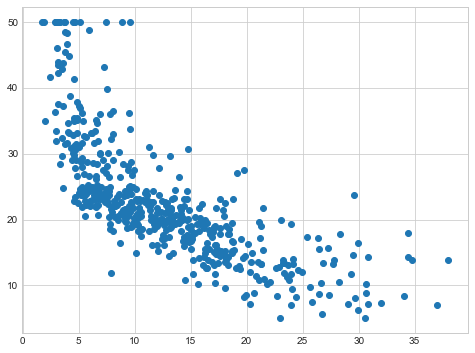

In [4]:
plt.figure(figsize=(8,6));
plt.scatter(X, y);

### Without Pre-processing

In [5]:
alpha = 0.0001
w_ = np.zeros(1 + X.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X, w_[1:]) + w_[0]
    errors = (y - y_pred)
    
    w_[1:] += alpha * X.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

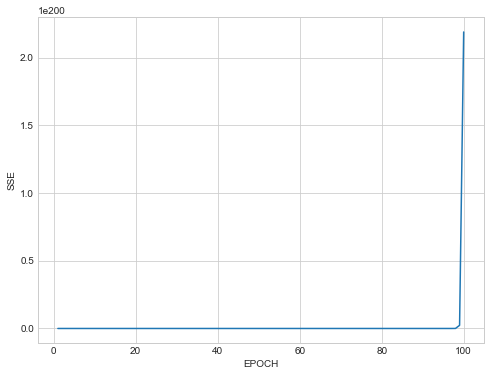

In [6]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('EPOCH');

Does not converge. SSE explodes. Model struggles without pre-processing

### With Pre-Processing

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

In [8]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors ** 2).sum() / 2.0
    cost_.append(cost)

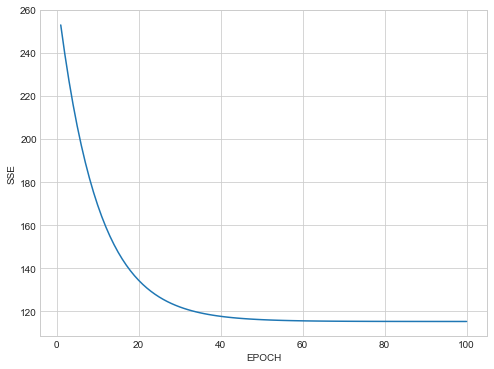

In [9]:
plt.figure(figsize=(8,6));
plt.plot(range(1, n_+ 1), cost_);
plt.ylabel('SSE');
plt.xlabel('EPOCH');

***

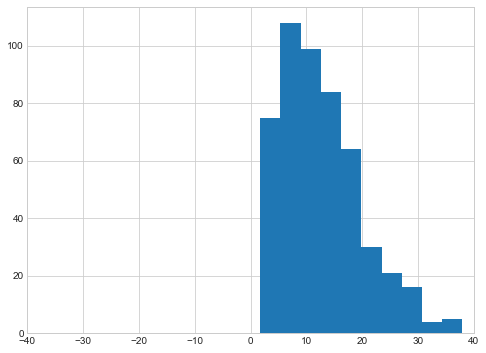

In [10]:
plt.figure(figsize=(8,6));
plt.hist(X);
plt.xlim(-40, 40);

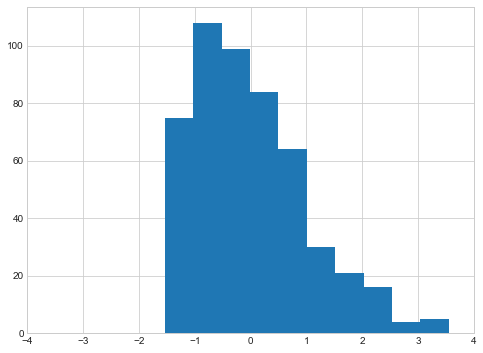

In [11]:
plt.figure(figsize=(8,6));
plt.hist(X_std);
plt.xlim(-4, 4);

## Data Pre-processing

 - Standardization/Mean Removal
 - Min-Max or Scaling Features to a Range
 - Normalization
 - Binarization



Assumptions:
 - Impicit/explicit assumptions of machine learning algorithms. The features follow a normal distribution.
 - Most methods are based on linear assumptions.
 - Most machine learning requires the data to be standard normally distributed. Gaussian with zero mean and unit variance

In [12]:
from sklearn import preprocessing

In [13]:
X_train = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])

In [14]:
X_train.mean(axis=0)

array([1.        , 0.        , 0.33333333])

In [15]:
X_train.std(axis=0)

array([0.81649658, 0.81649658, 1.24721913])

### Standardization / Mean Removal / Variance Scaling
<br>
<br>
Mean is removed. Data is centered on zero. This is to remove bias.
<br>
Standardization of datasets is a common requirement for many machine leartning estimators implemented in scikit-learn; they might behave badly if the indicidual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. "Standard normal" random variable with mean 0 and standard deviation 1.

$$X'=\frac{X-\bar{X}}{\theta}$$

In [16]:
X_scaled = preprocessing.scale(X_train)

In [17]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Scaled data has zero mean and unit variance:

In [18]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [19]:
X_scaled.std(axis=0)

array([1., 1., 1.])

Keep in mind that if you have scaled your trainign data, you must do likewise with the test data as well. However, your assumption that the mean and variance must be invariant between your train and test data. Scikit-learn assists witha built in utility function, StandardScalar.
    

In [20]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [22]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [23]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

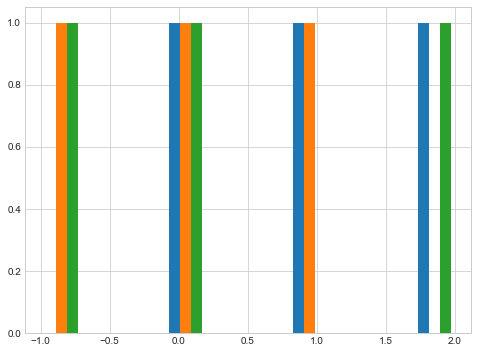

In [24]:
plt.figure(figsize=(8, 6));
plt.hist(X_train);

You can now utilize the transofrm for new test dataset.

In [25]:
X_test = [[-1., 1., 0.]]

In [26]:
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

### Min-Max or Scaling Features to a Range

Scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

The motivation to use this scaling include robustness to very small standard deviations of feature and preserving zero entries in sparse data.

#### MinMaxScaler

scale a data to the [0, 1] range:

In [27]:
X_train = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()

In [29]:
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [30]:
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Now to unseen data:

In [31]:
X_test = np.array([[ -3., -1., 4.]])

In [32]:
X_test_minmax = min_max_scaler.transform(X_test)

In [33]:
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

#### MaxAbsScaler

Works in a very similar fashion, but scales in a way that the training data lies within range [-1. 1] by dividing through the largest maximum value in each feature. It is meant for the data that is already centered at zero or sparse data.

In [34]:
X_train = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])

In [35]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [36]:
X_test = np.array([[ -3., -1., 4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

#### Scaling sparse data

Centering sparse data would destroy the sparseness sturcture in the data, and thus rarely is a sensible thing to do.


However, it can make sense to scale sparse inputs, especially if features are on different scales.

MaxAbsScaler and maxabs_scale were specifically designed for scaling sparse data


#### Scaling vs Whitening

It is sometimes not enough to center and scale the features independently, since a downstream model can further make some assumptions on the linear independence of the features

To address this issue, you can use sklearn.decomposition.PCA or sklean.decompossition.RandomizedPCA with whiten=True to further remove the linear correlation across features.

***
### Normalization

Normalization is the process of scaling individual samples to have unit norm.

This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pairs of samples.

$$X'=\frac{X-X_{mean}}{X_{max}-X_{min}}$$

This assumption is the base of the Vector Sapce Model often used in text classification and clustering contexts.

There are two types of Normalization:
1. L1 normalization: Least Absolute Deviations ensure the sum of absolute values is 1 in each row.
2. L2 normalization: Least squares, ensure that the sum of the squares is 1.

In [37]:
X = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

Alternatively

The preprocessing module further provices a ultility class Normalizer that implements the same operation useing the Transformer API.

In [38]:
normalizer = preprocessing.Normalizer().fit(X) # fit does nothing
normalizer

Normalizer(copy=True, norm='l2')

In [39]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### Binarization

$$f(x)=0,1$$

Feature binarization is the process of thresholding numerical features to get boolean values. This can be useful for downstream probabilistic estimators that make assumptions that the input data is distributed accoring to a multi-variate Bernoulli distribution.

It is also common amoung the text processing community to use binary feature value (probably to simplify the probabilistic reasoning) even if normalized counts (a.k.a. term frequencies) or TF-IDF valued features often perform slightly better in practice.

In [40]:
X = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])
binarizer = preprocessing.Binarizer().fit(X) # fit does nothing
binarizer

Binarizer(copy=True, threshold=0.0)

In [41]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Modify the threshold:

In [42]:
binarizer = preprocessing.Binarizer(threshold=1.1)

In [43]:
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

## Encoding categorical features

In [44]:
source = ['australia', 'singapore', 'new zealand', 'hong kong']

In [45]:
label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)

In [46]:
print("country to code mapping:\n")
for k, v in enumerate(label_enc.classes_):
    print(v, '\t', k)

country to code mapping:

australia 	 0
hong kong 	 1
new zealand 	 2
singapore 	 3


In [47]:
test_data = ['hong kong', 'singapore', 'australia', 'new zealand']

In [48]:
result = label_enc.transform(test_data)

In [49]:
print(result)

[1 3 0 2]


## One Hot / One-of-K Encoding
 - Useful for dealing with sparse matrix
 - uses one-of-k scheme
 
The process of turning a series of categorical responses into a set of binary results

In [50]:
source

['australia', 'singapore', 'new zealand', 'hong kong']

In [51]:
src

array([0, 3, 2, 1], dtype=int64)

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
one_hot_enc = OneHotEncoder(sparse=False)
src = src.reshape(len(src), 1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [57]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[0, :])])
print(invert_res)

['australia']


C:\Users\Kyle Jacobs\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [58]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[3, :])])
print(invert_res)

['hong kong']


C:\Users\Kyle Jacobs\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
